In [1]:
import keras as keras
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten, BatchNormalization, MaxPooling2D
from keras.initializers import glorot_uniform
from keras.initializers import Constant
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.datasets import cifar10, mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Resizing, RandomCrop, RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
from IPython.display import Image
import math 
from numba import jit
import xml.etree.ElementTree as ET
import argparse
import glob


2022-12-13 23:27:12.417519: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
file_path = '/Users/werther/221212_Project1/non_object/' # 바꿔야하는 이미지가 들어있는 파일
file_names = os.listdir(file_path)

file_names

['pepsi_zero_355_1314.jpg',
 'pepsi_zero_355_1472.jpg',
 'pepsi_zero_355_169.jpg',
 'pepsi_zero_355_1466.jpg',
 'pepsi_zero_355_1300.jpg',
 'pepsi_zero_355_1328.jpg',
 'pepsi_zero_355_633.jpg',
 'pepsi_zero_355_155.jpg',
 'pepsi_zero_355_2147.jpg',
 'pepsi_zero_355_141.jpg',
 'pepsi_zero_355_2153.jpg',
 'pepsi_zero_355_627.jpg',
 'pepsi_zero_355_814.jpg',
 'pepsi_zero_355_800.jpg',
 'pepsi_zero_355_828.jpg',
 'pepsi_zero_355_2184.jpg',
 'pepsi_zero_355_196.jpg',
 'pepsi_zero_355_2190.jpg',
 'pepsi_zero_355_182.jpg',
 'pepsi_zero_355_1499.jpg',
 'pepsi_zero_355_1670.jpg',
 'pepsi_zero_355_1116.jpg',
 'pepsi_zero_355_419.jpg',
 'pepsi_zero_355_1102.jpg',
 'pepsi_zero_355_1664.jpg',
 'pepsi_zero_355_1894.jpg',
 'pepsi_zero_355_357.jpg',
 'pepsi_zero_355_431.jpg',
 'pepsi_zero_355_425.jpg',
 'pepsi_zero_355_343.jpg',
 'pepsi_zero_355_1880.jpg',
 'pepsi_zero_355_1658.jpg',
 'pepsi_zero_355_394.jpg',
 'pepsi_zero_355_1857.jpg',
 'pepsi_zero_355_1843.jpg',
 'pepsi_zero_355_380.jpg',
 'pepsi_z

In [2]:
# 사진 이름 한번에 바꾸기
# file_name을 정렬해야된다는 이슈가 있다.
import os
file_path = '/Users/werther/221212_Project1/non_object/' # 바꿔야하는 이미지가 들어있는 파일
file_names = os.listdir(file_path)
num = 1
for name in file_names:
    src = os.path.join(file_path, name)
    
    dst = 'non_object_' + str(num) + '.jpg' # 바꿀 이름
    dst = os.path.join(file_path, dst)
    os.rename(src, dst)
    num += 1
    

# smple = file_names.sort()
# print(file_names.sort(key=lambda x: int(x[:x.index('.')])))

In [3]:
# 없는 파일 확인하기

import os
file_path = '/Users/werther/221212_Project1/pepsi_zero_500/xml/' # 바꿔야하는 이미지가 들어있는 파일
file_names = os.listdir(file_path)
num = 1
for name in file_names:
    if num == len(file_names) :
        break
    src = os.path.join(file_path, name)
    dst = 'pepsi_zero_500_' + str(num) + '.xml'     
    if dst not in file_names :
        print(dst)

    num += 1
    

In [60]:
coca_250_xml_df

,filename,width,height,class,xmin,ymin,xmax,ymax,object,rec_width,rec_height,x,y
0,coca_cola_250_102.jpg,224,224,1,11,50,169,224,1,158,174,90.0,137.0
1,coca_cola_250_116.jpg,224,224,1,3,3,163,224,1,160,221,83.0,114.0
2,coca_cola_250_300.jpg,80,107,1,20,35,55,87,1,35,52,38.0,61.0
3,coca_cola_250_466.jpg,80,107,1,26,34,57,81,1,31,47,42.0,58.0
4,coca_cola_250_472.jpg,80,107,1,25,34,58,83,1,33,49,42.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,coca_cola_250_325.jpg,80,107,1,22,28,64,92,1,42,64,43.0,60.0
484,coca_cola_250_319.jpg,80,107,1,22,31,63,91,1,41,60,42.0,61.0
485,coca_cola_250_480.jpg,80,107,1,18,37,57,89,1,39,52,38.0,63.0
486,coca_cola_250_133.jpg,224,224,1,14,0,175,217,1,161,217,94.0,108.0


In [69]:
# XML파일이 부족 할 때 없는 XML 찾기.

def findNoXml(csv) :
    csv_list = list(csv.filename)

    num = 1
    for i in csv_list :
        if f"pepsi_250_{num}.jpg" not in csv_list :
            print(f'{num} is not here.')
        num += 1

findNoXml(pepsi_250_xml_df)

228 is not here.
229 is not here.
230 is not here.
231 is not here.
232 is not here.
233 is not here.
234 is not here.
235 is not here.
236 is not here.
237 is not here.
238 is not here.
239 is not here.
240 is not here.
241 is not here.
242 is not here.
243 is not here.
244 is not here.
245 is not here.
246 is not here.
247 is not here.
248 is not here.
249 is not here.
250 is not here.
251 is not here.
252 is not here.
253 is not here.
254 is not here.
255 is not here.
256 is not here.
257 is not here.
258 is not here.
259 is not here.
260 is not here.


In [45]:
pepsi_zero_355_xml_df

,filename,width,height,class,xmin,ymin,xmax,ymax,object,rec_width,rec_height,x,y
0,pepsi_zero_355_196.jpg,224,224,5,58,21,152,177,1,94,156,105.0,99.0
1,pepsi_zero_355_828.jpg,224,224,5,40,30,157,186,1,117,156,98.0,108.0
2,pepsi_zero_355_182.jpg,224,224,5,72,14,167,170,1,95,156,120.0,92.0
3,pepsi_zero_355_1499.jpg,224,224,5,65,33,174,187,1,109,154,120.0,110.0
4,pepsi_zero_355_814.jpg,224,224,5,38,26,155,182,1,117,156,96.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,pepsi_zero_355_819.jpg,224,224,5,40,33,157,189,1,117,156,98.0,111.0
1664,pepsi_zero_355_1480.jpg,224,224,5,57,28,159,183,1,102,155,108.0,106.0
1665,pepsi_zero_355_825.jpg,224,224,5,40,31,157,187,1,117,156,98.0,109.0
1666,pepsi_zero_355_831.jpg,224,224,5,41,40,157,196,1,116,156,99.0,118.0


In [ ]:
# yolo : 빠르게
# RCNN : 정확하게

from xml.etree.ElementTree import parse

xml_file = './image/AirPodsProCase.xml'

tree = parse(xml_file)
root = tree.getroot()

for object in root.iter('object') :
    xmin = int(object.find('bndbox').findtext('xmin'))
    ymin = int(object.find('bndbox').findtext('ymin'))
    xmax = int(object.find('bndbox').findtext('xmax'))    
    ymax = int(object.find('bndbox').findtext('ymax'))        
    print(xmin, ymin, xmax, ymax)

# Start

In [3]:
path = '/Users/werther/221212_Project1/non_object/' # folder path

os.chdir(path) # move to the folder
files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
_imgs = []
img_names = []
# print(files)

for file in files:
    if '.jpg' in file: 
        img_names.append(file.split('.')[0])
        src = cv2.imread(file)
        f = cv2.resize(src, (224, 224)) # resize img
        _imgs.append(f)
np.array(_imgs).shape

(2718, 224, 224, 3)

In [124]:
# XML to CSV

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        filename = root.find('filename').text
        width = int(root.find('size').find('width').text)
        height = int(root.find('size').find('height').text)
        for member in root.findall('object'):
            bndbox = member.find('bndbox')
            value = (filename,
                    width,
                    height,
                    member.find('name').text,
                    int(bndbox.find('xmin').text),
                    int(bndbox.find('ymin').text),
                    int(bndbox.find('xmax').text),
                    int(bndbox.find('ymax').text),
                    )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                  'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


In [125]:
info = xml_to_csv('/Users/werther/221212_Project1/pepsi_zero_355/xml/')
info

,filename,width,height,class,xmin,ymin,xmax,ymax
0,pepsi_zero_355_196.jpg,1440,1440,pepsi355,371,134,978,1136
1,pepsi_zero_355_828.jpg,1440,1440,pepsi355,259,194,1008,1197
2,pepsi_zero_355_182.jpg,1440,1440,pepsi355,465,93,1072,1095
3,pepsi_zero_355_1499.jpg,1440,1440,pepsi355,421,212,1118,1204
4,pepsi_zero_355_814.jpg,1440,1440,pepsi355,247,164,996,1167
...,...,...,...,...,...,...,...,...
1663,pepsi_zero_355_819.jpg,1440,1440,pepsi355,259,212,1008,1215
1664,pepsi_zero_355_1480.jpg,1440,1440,pepsi355,365,178,1024,1176
1665,pepsi_zero_355_825.jpg,1440,1440,pepsi355,259,200,1008,1203
1666,pepsi_zero_355_831.jpg,1440,1440,pepsi355,263,256,1012,1259


In [88]:
1440 / 224

6.428571428571429

In [89]:
224 * 6.428571428571429

1440.0

In [126]:
info = info
ratio = list(info.width / 224)[0]

def resizeXMLData(info, ratio) :
    for idx in range(len(info)):
        info.loc[[idx], ['width']] = round(info.loc[[idx], ['width']] / ratio)
        info.loc[[idx], ['height']] = round(info.loc[[idx], ['height']] / ratio)
        info.loc[[idx], ["xmin"]] = round(info.loc[[idx], ['xmin']] / ratio)
        info.loc[[idx], ['ymin']] = round(info.loc[[idx], ['ymin']] / ratio)
        info.loc[[idx], ['xmax']] = round(info.loc[[idx], ['xmax']] / ratio) 
        info.loc[[idx], ['ymax']] = round(info.loc[[idx], ['ymax']] / ratio)
    
    

In [130]:
info.loc[:, ['class']] = "pepsi_zero"
info

,filename,width,height,class,xmin,ymin,xmax,ymax
0,pepsi_zero_355_196.jpg,224,224,pepsi_zero,58,21,152,177
1,pepsi_zero_355_828.jpg,224,224,pepsi_zero,40,30,157,186
2,pepsi_zero_355_182.jpg,224,224,pepsi_zero,72,14,167,170
3,pepsi_zero_355_1499.jpg,224,224,pepsi_zero,65,33,174,187
4,pepsi_zero_355_814.jpg,224,224,pepsi_zero,38,26,155,182
...,...,...,...,...,...,...,...,...
1663,pepsi_zero_355_819.jpg,224,224,pepsi_zero,40,33,157,189
1664,pepsi_zero_355_1480.jpg,224,224,pepsi_zero,57,28,159,183
1665,pepsi_zero_355_825.jpg,224,224,pepsi_zero,40,31,157,187
1666,pepsi_zero_355_831.jpg,224,224,pepsi_zero,41,40,157,196


# 주소를 받아서 사이즈 수정 한번에

In [4]:
def non_to_df(path) : # non-object를 dtaframe으로
    file_names = os.listdir(path)
    non_list = []
    
    for name in file_names : 
        value = (name,0,0,0,0,0,0,0,0)
        non_list.append(value)
    column_name = ['filename', 'width', 'height',
                  'class', 'xmin', 'ymin', 'xmax', 'ymax', 'object']
    non_df = pd.DataFrame(non_list, columns=column_name)
    return non_df

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        filename = root.find('filename').text
        width = int(root.find('size').find('width').text)
        height = int(root.find('size').find('height').text)
        for member in root.findall('object'):
            bndbox = member.find('bndbox')
            value = (filename,
                    width,
                    height,
                    member.find('name').text,
                    int(bndbox.find('xmin').text),
                    int(bndbox.find('ymin').text),
                    int(bndbox.find('xmax').text),
                    int(bndbox.find('ymax').text),
                    )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                  'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

def resizeXMLData(info, width_ratio, height_ratio, classNum) :
    if classNum >= 1:
        info.loc[:, ['object']] = 1
    else :
        info.loc[:, ['object']] = 0        
    info.loc[:, ['class']] = classNum
    for idx in range(len(info)):
        info.loc[[idx], ['width']] = round(info.loc[[idx], ['width']] / width_ratio)
        info.loc[[idx], ['height']] = round(info.loc[[idx], ['height']] / height_ratio)
        info.loc[[idx], ["xmin"]] = round(info.loc[[idx], ['xmin']] / width_ratio)
        info.loc[[idx], ['ymin']] = round(info.loc[[idx], ['ymin']] / height_ratio)
        info.loc[[idx], ['xmax']] = round(info.loc[[idx], ['xmax']] / width_ratio)
        info.loc[[idx], ['ymax']] = round(info.loc[[idx], ['ymax']] / height_ratio)
        info['rec_width'] = info['xmax'] - info['xmin']
        info['rec_height'] = info['ymax'] - info['ymin']
        info['x'] = round((info.xmin + info.xmax)/2)  #바인딩 박스 중심 x점
        info['y'] = round((info.ymin + info.ymax)/2)  #바인딩 박스 중심 y점


def checkAll(path, xml_path='no', classNum=0, is_non=False) :
    os.chdir(path) # move to the folder
    files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
    img_names = []
    # print(files)

    for file in files:
        if '.jpg' in file: 
            img_names.append(file.split('.')[0])
            src = cv2.imread(file)
            f = cv2.resize(src, (224, 224)) # resize img
            globals()['imgs'].append(f)
    np.array(imgs).shape    
    
    if is_non == True :
        return non_to_df(path)
    
    xml_df = xml_to_csv(xml_path)
    
    width_ratio = list(xml_df.width / 224)[0]
    height_ratio = list(xml_df.height / 224)[0]
    
    resizeXMLData(xml_df, width_ratio, height_ratio, classNum)
    
    
    return xml_df
        

In [5]:
globals()['imgs'] = []

# pepsi
pepsi_zero_355_path = '/Users/werther/221212_Project1/pepsi_zero_355/'
pepsi_zero_355_xml_path = '/Users/werther/221212_Project1/pepsi_zero_355/xml/'
pepsi_zero_355_xml_df = checkAll(pepsi_zero_355_path, pepsi_zero_355_xml_path, 5)

pepsi_zero_500_path = '/Users/werther/221212_Project1/pepsi_zero_500/'
pepsi_zero_500_xml_path = '/Users/werther/221212_Project1/pepsi_zero_500/xml/'
pepsi_zero_500_xml_df = checkAll(pepsi_zero_500_path, pepsi_zero_500_xml_path, 6)

pepsi_250_path = '/Users/werther/221212_Project1/pepsi_250/'
pepsi_250_xml_path = '/Users/werther/221212_Project1/pepsi_250/xml/'
pepsi_250_xml_df = checkAll(pepsi_250_path, pepsi_250_xml_path, 3)

pepsi_355_path = '/Users/werther/221212_Project1/pepsi_355/'
pepsi_355_xml_path = '/Users/werther/221212_Project1/pepsi_355/xml/'
pepsi_355_xml_df = checkAll(pepsi_355_path, pepsi_355_xml_path, 4)

# coca
coca_250_path = '/Users/werther/221212_Project1/coca_cola_250/'
coca_250_xml_path = '/Users/werther/221212_Project1/coca_cola_250/xml/'
coca_250_xml_df = checkAll(coca_250_path, coca_250_xml_path, 1)

coca_350_path = '/Users/werther/221212_Project1/coca_cola_350/'
coca_350_xml_path = '/Users/werther/221212_Project1/coca_cola_350/xml/'
coca_350_xml_df = checkAll(coca_350_path, coca_350_xml_path, 2)

coca_z_250_path = '/Users/werther/221212_Project1/coca_cola_zero_250/'
coca_z_250_xml_path = '/Users/werther/221212_Project1/coca_cola_zero_250/xml/'
coca_z_250_xml_df = checkAll(coca_z_250_path, coca_z_250_xml_path, 9)

coca_z_355_path = '/Users/werther/221212_Project1/coca_cola_zero_355/'
coca_z_355_xml_path = '/Users/werther/221212_Project1/coca_cola_zero_355/xml/'
coca_z_355_xml_df = checkAll(coca_z_355_path, coca_z_355_xml_path, 10)

#chilsung
chil_250_path = '/Users/werther/221212_Project1/chilsung_250/'
chil_250_xml_path = '/Users/werther/221212_Project1/chilsung_250/xml/'
chil_250_xml_df = checkAll(chil_250_path, chil_250_xml_path, 11)

chil_355_path = '/Users/werther/221212_Project1/chilsung_355/'
chil_355_xml_path = '/Users/werther/221212_Project1/chilsung_355/xml/'
chil_355_xml_df = checkAll(chil_355_path, chil_355_xml_path, 12)

# pocari
pocari_240_path = '/Users/werther/221212_Project1/pocari_240/'
pocari_240_xml_path = '/Users/werther/221212_Project1/pocari_240/xml/'
pocari_240_xml_df = checkAll(pocari_240_path, pocari_240_xml_path, 7)

pocari_620_path = '/Users/werther/221212_Project1/pocari_620/'
pocari_620_xml_path = '/Users/werther/221212_Project1/pocari_620/xml/'
pocari_620_xml_df = checkAll(pocari_620_path, pocari_620_xml_path, 8)

# sprite
spr_250_path = '/Users/werther/221212_Project1/sprite_250/'
spr_250_xml_path = '/Users/werther/221212_Project1/sprite_250/xml/'
spr_250_xml_df = checkAll(spr_250_path, spr_250_xml_path, 13)

spr_350_path = '/Users/werther/221212_Project1/sprite_350/'
spr_350_xml_path = '/Users/werther/221212_Project1/sprite_350/xml/'
spr_350_xml_df = checkAll(spr_350_path, spr_350_xml_path, 14)


# non_object
path = '/Users/werther/221212_Project1/non_object/'
non_df = checkAll(path, is_non=True)

In [6]:
np.array(imgs).shape

(15100, 224, 224, 3)

In [7]:
total_x = np.array(imgs)
total_x.shape

(15100, 224, 224, 3)

In [9]:
total_info_df = pd.concat([pepsi_zero_355_xml_df,
                    pepsi_zero_500_xml_df,
                    pepsi_250_xml_df,
                    pepsi_355_xml_df,
                    coca_250_xml_df,
                    coca_350_xml_df,
                    coca_z_250_xml_df,
                    coca_z_355_xml_df,
                    chil_250_xml_df,
                    chil_355_xml_df,
                    pocari_240_xml_df,
                    pocari_620_xml_df,
                    spr_250_xml_df,
                    spr_350_xml_df, 
                    non_df])

Y = total_info_df[['class', 'rec_width', 'rec_height', 'x', 'y', 'object']]

In [10]:
total_info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,object,rec_width,rec_height,x,y
0,pepsi_zero_355_196.jpg,224,224,5,58,21,152,177,1,94.0,156.0,105.0,99.0
1,pepsi_zero_355_828.jpg,224,224,5,40,30,157,186,1,117.0,156.0,98.0,108.0
2,pepsi_zero_355_182.jpg,224,224,5,72,14,167,170,1,95.0,156.0,120.0,92.0
3,pepsi_zero_355_1499.jpg,224,224,5,65,33,174,187,1,109.0,154.0,120.0,110.0
4,pepsi_zero_355_814.jpg,224,224,5,38,26,155,182,1,117.0,156.0,96.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,non_object_1568.jpg,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2714,non_object_544.jpg,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2715,non_object_2075.jpg,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2716,non_object_2713.jpg,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [11]:
x_train, x_test, y_train, y_test = train_test_split(total_x, Y,
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=Y['class'], #class를 기준으로
                                                    random_state=34)

In [12]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12080, 224, 224, 3) (3020, 224, 224, 3) (12080, 6) (3020, 6)


# 넘파이 변환

In [13]:
y_test = y_test.fillna(0)
y_train = y_train.fillna(0)

# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [18]:
# y_train_c : class
y_train_c = y_train['class']
y_train_c = np.array(y_train_c)
y_train_c = to_categorical(y_train_c)

y_test_c = y_test['class']
y_test_c = np.array(y_test_c)
y_test_c = to_categorical(y_test_c)
y_test_c.shape

(3020, 15)

In [15]:
# y_train_4 : 4 columns
y_train_4 = y_train.iloc[:, 1:5]
y_train_4 = np.array(y_train_4)
y_train_4.shape

y_test_4 = y_test.iloc[:, 1:5]
y_test_4 = np.array(y_test_4)
y_test_4.shape

(3020, 4)

In [16]:
y_train_o = y_train['object']
y_train_o = np.array(y_train_o)
y_train_o = to_categorical(y_train_o)
y_train_o.shape

y_test_o = y_test['object']
y_test_o = np.array(y_test_o)
y_test_o = to_categorical(y_test_o)
y_test_o.shape

(3020, 2)

# normalize

In [ ]:
# normalizing
x_train = x_train/255
x_test = x_test/255


# Model Function

In [ ]:
class MyCallback(Callback):
    def on_epoch_end(self, end, logs={}):
        if logs.get('val_acc') > 0.95:
            self.model.stop_training = True
            print('\n')
            print('목표 정확도 달성: 검증 정확도 %.4f' % logs.get('val_acc'))
my_callback = MyCallback()



def mdFit(model, num, X_train, y_train, x_test, y_test, epochs, my_callback) : # + best model select.

    model.summary()
       
    best_model_path = f"./bestModel/LeNet5/best_cnn_model{num}.h5" 
    save_best_model = ModelCheckpoint(best_model_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=False)

    globals()[f'hist{num}'] = model.fit(
        x=X_train, y=y_train, batch_size=128, epochs=epochs, verbose=1,
        callbacks=[my_callback ,save_best_model], validation_data=(x_test, y_test)) # validation_split=0.2
    # validation : (x_test, y_test)값을 가지고 와서 봐도 된다. 현재 0.2의 비율로 가져와서
    
    globals()[f'best_model{num}'] = load_model(best_model_path)
    globals()[f'best_model{num}'].summary()
    
    
def mdEval(model, x_tst, y_tst) :
    model.evaluate(x_tst, y_tst, batch_size=30, verbose=1)
    
def mdPred(model, X_tst) :
    result = model.predict(X_tst)
    return result

# Model Network

In [20]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

## Model_1

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


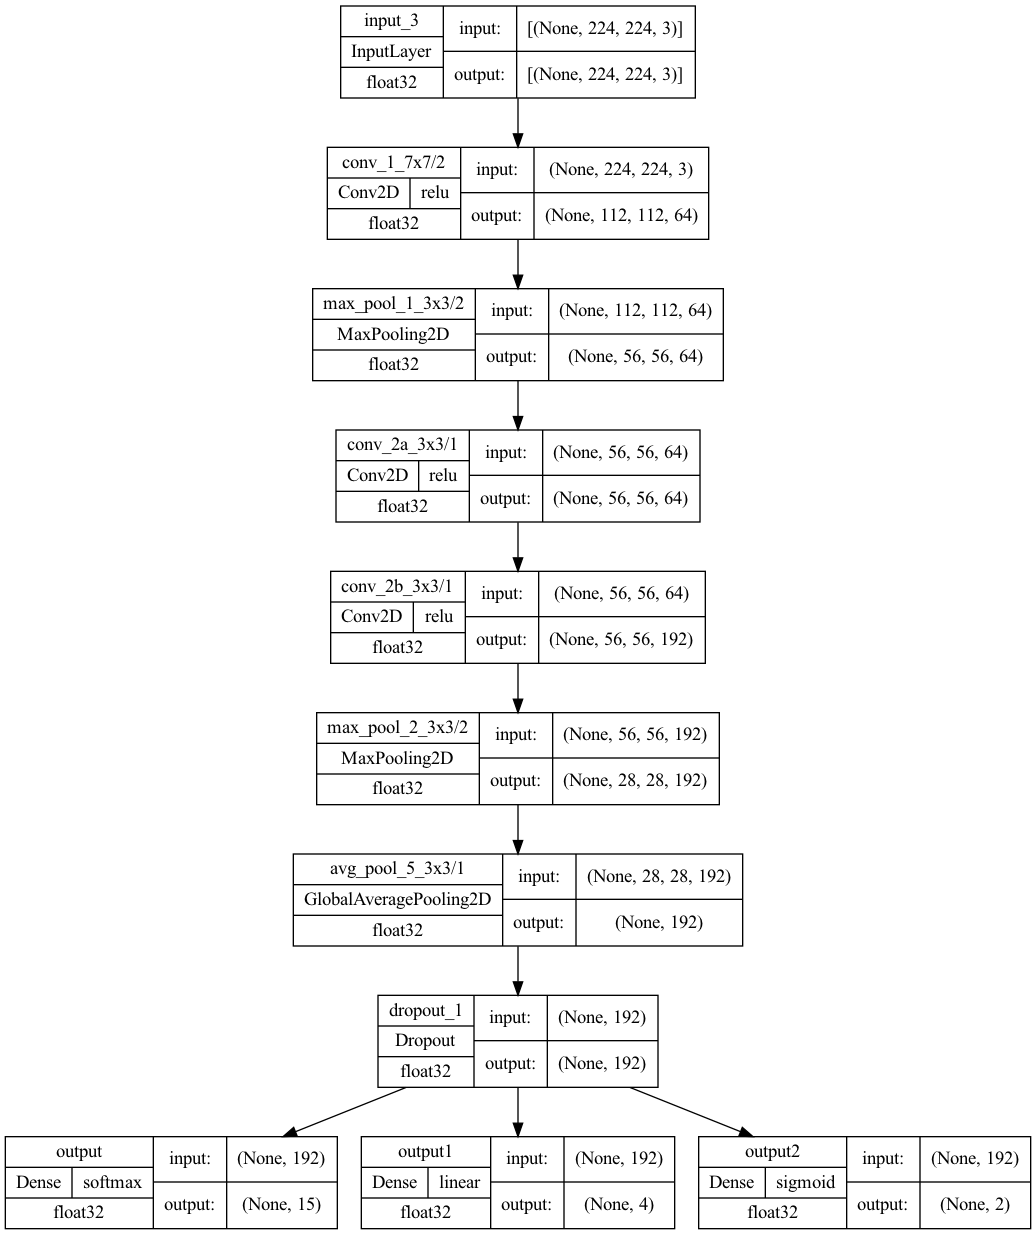

In [22]:
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
y = Dropout(0.4)(x)

x = Dense(15, activation='softmax', name='output')(y)
x1 = Dense(4, activation='linear', name='output1')(y)
x2 = Dense(2, activation='sigmoid', name='output2')(y)

model = Model(input_layer, [x, x1, x2], name='inception_v1')

model.compile(optimizer='adam',
              loss=['categorical_crossentropy',
                   'mse',
                   'binary_crossentropy'],
              loss_weights=[0.5, 0.5, 0.5],
              #No OneHot Encoding : sparse_categorical_crossentropy
              metrics=['accuracy']) #acc, accuracy

plot_model(model, show_shapes=True, show_dtype=True, show_layer_activations=True)
# model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [224]:
mdFit(model, 1, x_train, y_trian=[y_train_c, y_train_4, y_train_o], 
      x_test, y_test=[y_test_c, y_test_4, y_test_o], epochs=30, my_callback)



SyntaxError: positional argument follows keyword argument (2735503369.py, line 2)

In [23]:
history = model.fit(x_train, [y_train_c, y_train_4, y_train_o], 
                    validation_data = (x_test, [y_test_c, y_test_4, y_test_o]), 
                    epochs=50, batch_size=320) # , callbacks=my_callback


Epoch 1/50
38/38 [==============================] - 179s 5s/step - loss: 1752.4976 - output_loss: 37.6533 - output1_loss: 3461.9629 - output2_loss: 5.3797 - output_accuracy: 0.0909 - output1_accuracy: 0.3205 - output2_accuracy: 0.7600 - val_loss: 1222.2014 - val_output_loss: 8.5990 - val_output1_loss: 2433.2163 - val_output2_loss: 2.5872 - val_output_accuracy: 0.1695 - val_output1_accuracy: 0.4215 - val_output2_accuracy: 0.8199
Epoch 2/50
38/38 [==============================] - 188s 5s/step - loss: 1289.2383 - output_loss: 26.0079 - output1_loss: 2548.5015 - output2_loss: 3.9667 - output_accuracy: 0.1031 - output1_accuracy: 0.3489 - output2_accuracy: 0.7950 - val_loss: 1241.8073 - val_output_loss: 6.6183 - val_output1_loss: 2474.7283 - val_output2_loss: 2.2680 - val_output_accuracy: 0.2818 - val_output1_accuracy: 0.4222 - val_output2_accuracy: 0.8199
Epoch 3/50
38/38 [==============================] - 182s 5s/step - loss: 1149.9608 - output_loss: 18.8334 - output1_loss: 2278.2800 - ou

38/38 [==============================] - 176s 5s/step - loss: 485.6752 - output_loss: 0.8682 - output1_loss: 970.3342 - output2_loss: 0.1481 - output_accuracy: 0.7700 - output1_accuracy: 0.5129 - output2_accuracy: 0.9610 - val_loss: 430.9702 - val_output_loss: 0.2232 - val_output1_loss: 861.6513 - val_output2_loss: 0.0658 - val_output_accuracy: 0.9391 - val_output1_accuracy: 0.5334 - val_output2_accuracy: 0.9762
Epoch 21/50
38/38 [==============================] - 176s 5s/step - loss: 460.9638 - output_loss: 0.7893 - output1_loss: 921.0082 - output2_loss: 0.1300 - output_accuracy: 0.7835 - output1_accuracy: 0.5098 - output2_accuracy: 0.9640 - val_loss: 406.3959 - val_output_loss: 0.2465 - val_output1_loss: 812.4877 - val_output2_loss: 0.0573 - val_output_accuracy: 0.9219 - val_output1_accuracy: 0.5589 - val_output2_accuracy: 0.9811
Epoch 22/50
38/38 [==============================] - 177s 5s/step - loss: 456.6139 - output_loss: 0.7293 - output1_loss: 912.3785 - output2_loss: 0.1196 - o

38/38 [==============================] - 177s 5s/step - loss: 358.0359 - output_loss: 0.3534 - output1_loss: 715.6696 - output2_loss: 0.0488 - output_accuracy: 0.8748 - output1_accuracy: 0.5507 - output2_accuracy: 0.9855 - val_loss: 314.4705 - val_output_loss: 0.1285 - val_output1_loss: 628.7721 - val_output2_loss: 0.0403 - val_output_accuracy: 0.9593 - val_output1_accuracy: 0.5894 - val_output2_accuracy: 0.9897
Epoch 40/50
38/38 [==============================] - 177s 5s/step - loss: 376.2592 - output_loss: 0.4027 - output1_loss: 752.0574 - output2_loss: 0.0583 - output_accuracy: 0.8639 - output1_accuracy: 0.5531 - output2_accuracy: 0.9825 - val_loss: 313.4431 - val_output_loss: 0.1750 - val_output1_loss: 626.6724 - val_output2_loss: 0.0389 - val_output_accuracy: 0.9235 - val_output1_accuracy: 0.5795 - val_output2_accuracy: 0.9861
Epoch 41/50
38/38 [==============================] - 177s 5s/step - loss: 370.4969 - output_loss: 0.3829 - output1_loss: 740.5615 - output2_loss: 0.0494 - o

## Model_2 : with MaxPool2D, Batchnor..

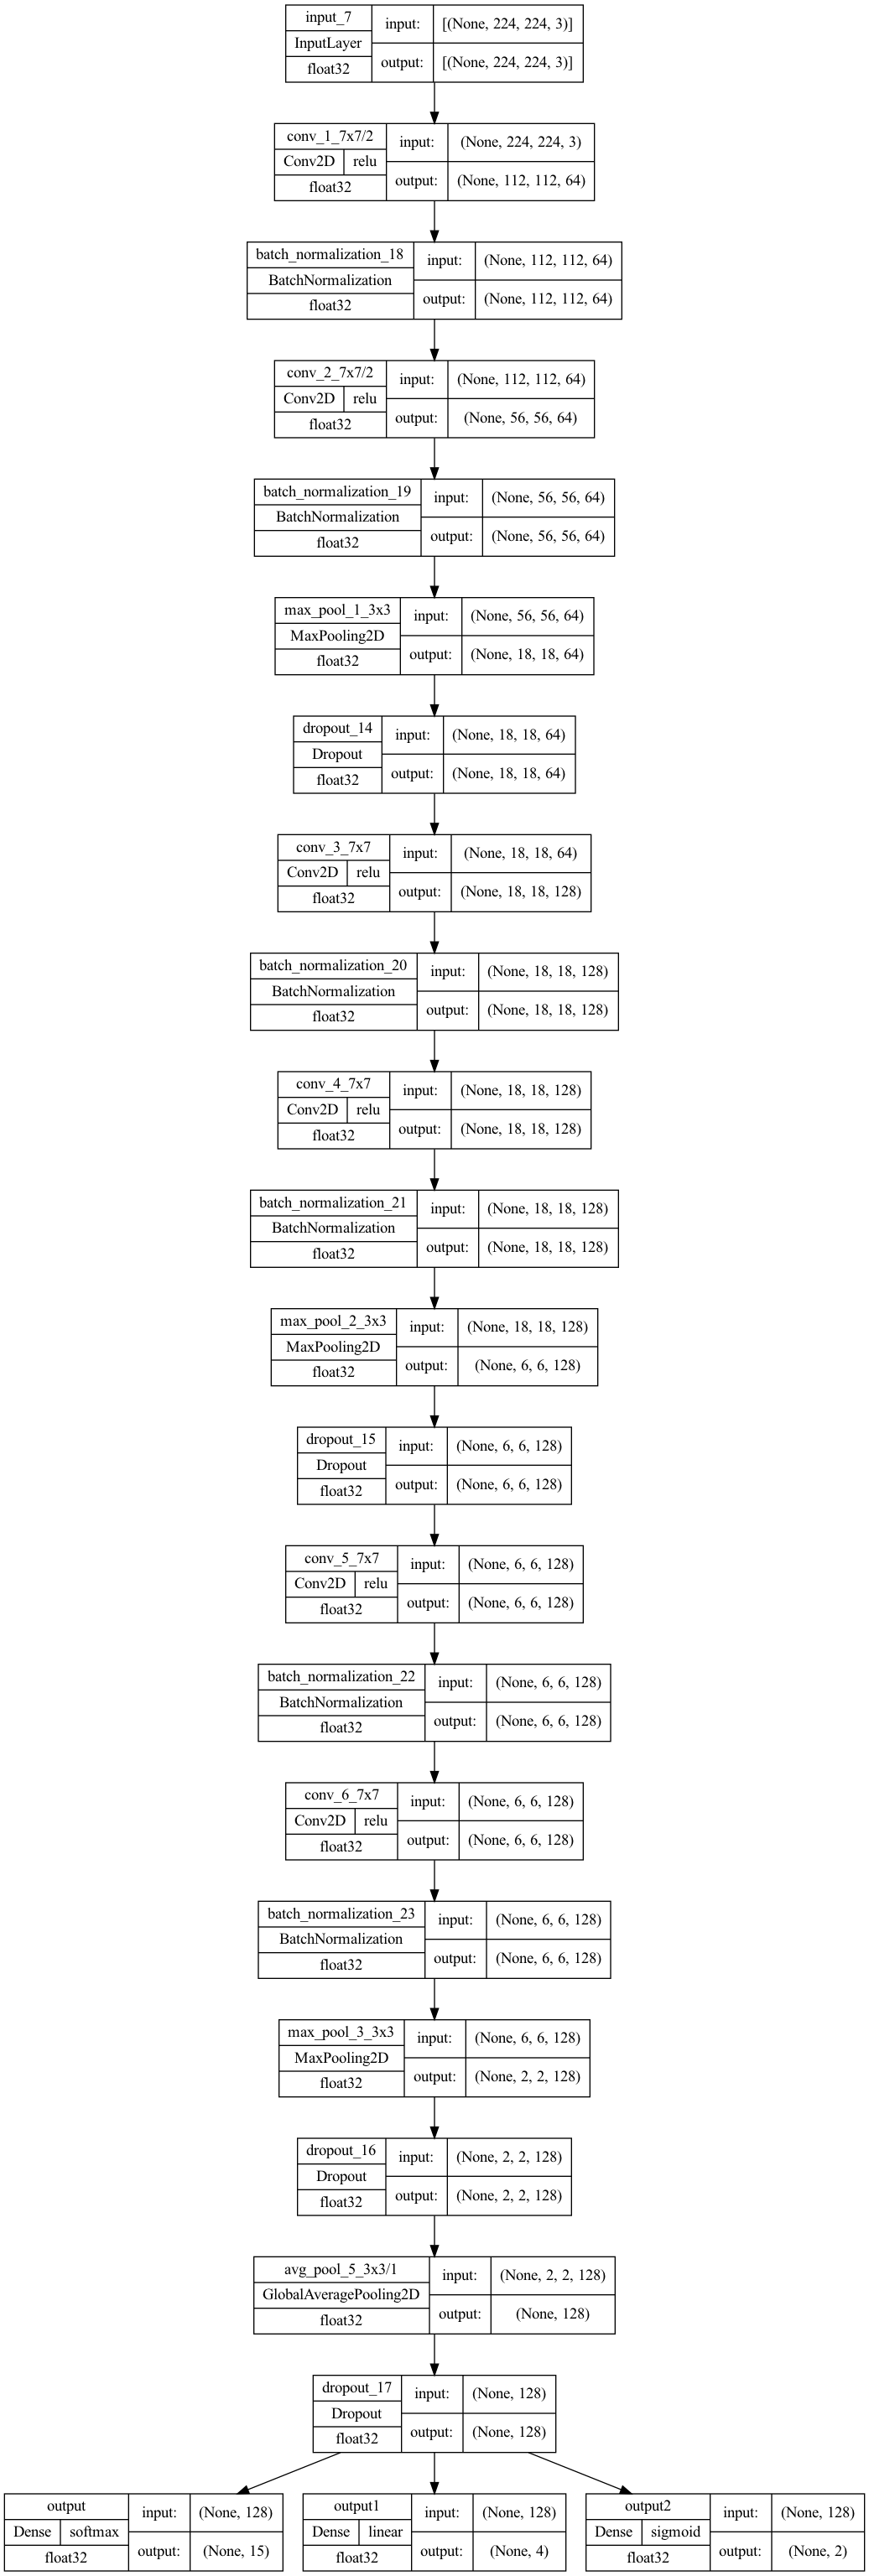

In [27]:
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = BatchNormalization()(x)
x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_2_7x7/2')(x)
x = BatchNormalization()(x)
x = MaxPool2D((3, 3), name='max_pool_1_3x3')(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (7, 7), padding='same', activation='relu', name='conv_3_7x7')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (7, 7), padding='same', activation='relu', name='conv_4_7x7')(x)
x = BatchNormalization()(x)
x = MaxPool2D((3, 3), name='max_pool_2_3x3')(x)
x = Dropout(0.25)(x)
x = Conv2D(128, (7, 7), padding='same', activation='relu', name='conv_5_7x7')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (7, 7), padding='same', activation='relu', name='conv_6_7x7')(x)
x = BatchNormalization()(x)
x = MaxPool2D((3, 3), name='max_pool_3_3x3')(x)
x = Dropout(0.35)(x)

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
y = Dropout(0.5)(x)

x = Dense(15, activation='softmax', name='output')(y)
x1 = Dense(4, activation='linear', name='output1')(y)
x2 = Dense(2, activation='sigmoid', name='output2')(y)

model_2 = Model(input_layer, [x, x1, x2], name='model_2')

model_2.compile(optimizer='adam',
              loss=['categorical_crossentropy',
                   'mse',
                   'binary_crossentropy'],
              loss_weights=[0.5, 0.5, 0.5],
              #No OneHot Encoding : sparse_categorical_crossentropy
              metrics=['accuracy']) #acc, accuracy

plot_model(model_2, show_shapes=True, show_dtype=True, show_layer_activations=True)
# model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(x_train, [y_train_c, y_train_4, y_train_o], 
                        validation_data = (x_test, [y_test_c, y_test_4, y_test_o]), 
                        epochs=50, batch_size=320) # , callbacks=my_callback


Epoch 1/50
38/38 [==============================] - 463s 12s/step - loss: 4627.3032 - output_loss: 5.7532 - output1_loss: 9248.2402 - output2_loss: 0.6115 - output_accuracy: 0.1079 - output1_accuracy: 0.3361 - output2_accuracy: 0.8195 - val_loss: 239481.1094 - val_output_loss: 363.7681 - val_output1_loss: 478478.1562 - val_output2_loss: 120.3121 - val_output_accuracy: 0.1801 - val_output1_accuracy: 0.0742 - val_output2_accuracy: 0.1801
Epoch 2/50
38/38 [==============================] - 457s 12s/step - loss: 3562.7275 - output_loss: 4.8980 - output1_loss: 7120.4604 - output2_loss: 0.0978 - output_accuracy: 0.2354 - output1_accuracy: 0.3802 - output2_accuracy: 0.9791 - val_loss: 15422.9375 - val_output_loss: 46.2318 - val_output1_loss: 30779.4062 - val_output2_loss: 20.2376 - val_output_accuracy: 0.1801 - val_output1_accuracy: 0.0752 - val_output2_accuracy: 0.1798
Epoch 3/50
32/38 [========================>.....] - ETA: 1:12 - loss: 2736.2791 - output_loss: 4.5820 - output1_loss: 5467.9

## Model_3 : Modify GoogLeNet 

In [ ]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', 
                      kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', 
                      kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', 
                      kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', 
                      kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', 
                      kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', 
                       kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [ ]:
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

y = Dropout(0.5)(x)

x = Dense(15, activation='softmax', name='output')(y)
x1 = Dense(4, activation='linear', name='output1')(y)
x2 = Dense(2, activation='sigmoid', name='output2')(y)

model_3 = Model(input_layer, [x, x1, x2], name='modify_googlenet')

plot_model(model_3, show_shapes=True, show_dtype=True, show_layer_activations=True)

In [ ]:
history_3 = model_3.fit(x_train, [y_train_c, y_train_4, y_train_o], 
                        validation_data = (x_test, [y_test_c, y_test_4, y_test_o]), 
                        epochs=50, batch_size=320) # , callbacks=my_callback
